In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'./dataset/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handle NULL Values

In [6]:
# Display those columns which contains null values
df.columns[df.isnull().sum() > 0].tolist()

['children', 'country', 'agent', 'company']

In [7]:
# Display those columns with total null values
df.isnull().sum()[df.isnull().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [8]:
# Drop agent and company columns as it contain huge NULL values
df.drop(['agent','company'], axis=1,inplace=True)

In [9]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

### Perform Data Cleaning

In [10]:
# The PRT country has the maximum booking so we will fill null values with PRT
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [11]:
df.fillna(0,inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df['children'].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [14]:
df['adults'].value_counts()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [15]:
df['babies'].value_counts()

babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

In [16]:
# find all the rows that contain children = 0 and adult=0 and babbies=0
filter = (df['children'] == 0 ) & (df['adults'] == 0) & (df['babies'] == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [17]:
# create a dataframe that do not contains all the data which are not children == 0 and adult == 0 and babbies == 0
df_main = df[~filter]
df_main.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [19]:
df_main.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### From where all the guest come

In [21]:
# Find out the from where all the guest comming. Select only those rows that did not cancel the booking
df_guest_from_countries = df_main['country'][df_main['is_canceled'] == 0]
len(df_guest_from_countries)

75011

In [22]:
(df_guest_from_countries.value_counts() / len(df_guest_from_countries) ) * 100

country
PRT    28.526483
GBR    12.888776
FRA    11.289011
ESP     8.509419
DEU     8.088147
         ...    
BHR     0.001333
DJI     0.001333
MLI     0.001333
NPL     0.001333
FRO     0.001333
Name: count, Length: 165, dtype: float64

In [23]:
df_country_wise_date = df_guest_from_countries.value_counts().reset_index()
df_country_wise_date.columns = ['countries','no_of_guests']
df_country_wise_date

,countries,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


### How much guest pay for the room

In [26]:
df_main.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [29]:
df_booking_wo_cancelled = df_main[df_main['is_canceled'] == 0]

Text(0, 0.5, 'Price(EUR)')

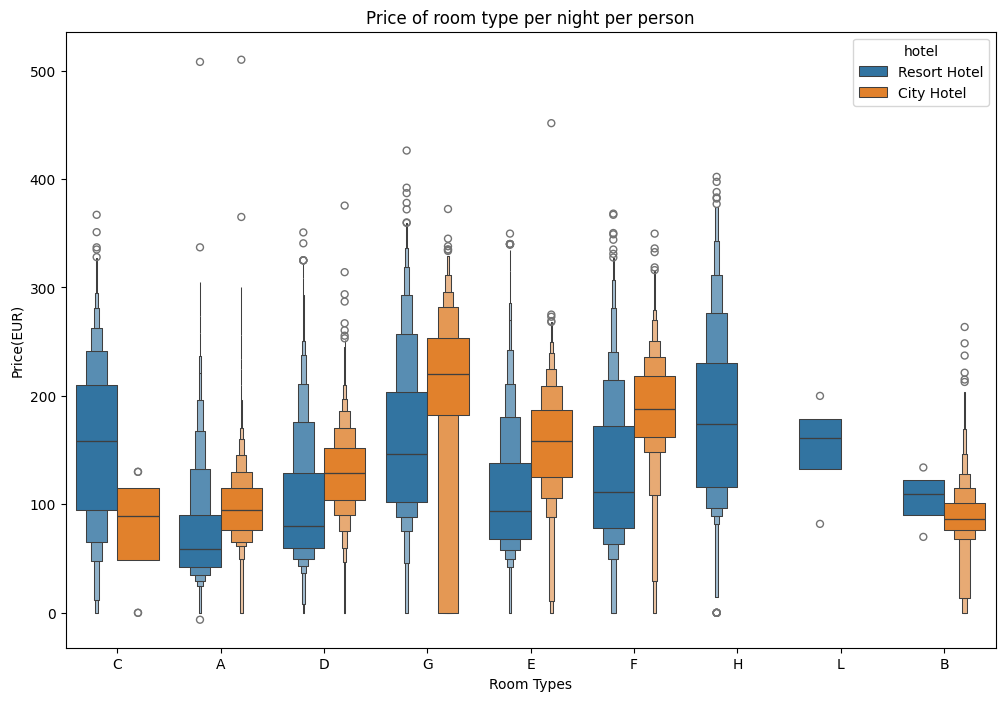

In [30]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="reserved_room_type",y='adr',hue='hotel', data=df_booking_wo_cancelled)

plt.title("Price of room type per night per person")
plt.xlabel('Room Types')
plt.ylabel('Price(EUR)')

### Which are the busy months

In [31]:
df_booking_wo_cancelled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [32]:
df_booking_wo_cancelled['hotel'].value_counts()

hotel
City Hotel      46084
Resort Hotel    28927
Name: count, dtype: int64

In [33]:
df_city_hotel = df_booking_wo_cancelled[(df_booking_wo_cancelled['hotel'] == 'City Hotel') & (df_booking_wo_cancelled['is_canceled'] == 0)]
df_resort_hotel = df_booking_wo_cancelled[(df_booking_wo_cancelled['hotel'] == 'Resort Hotel') & (df_booking_wo_cancelled['is_canceled'] == 0)]

In [34]:
df_city_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
df_city_hotel = df_city_hotel['arrival_date_month'].value_counts().reset_index()
df_city_hotel.columns = ['arrival_date_month','city_count']

In [36]:
df_resort_hotel = df_resort_hotel['arrival_date_month'].value_counts().reset_index()
df_resort_hotel.columns = ['arrival_date_month','resort_count']

In [37]:
df_hotels = pd.merge(df_resort_hotel, df_city_hotel, on='arrival_date_month')
df_hotels
#df_resort_hotel.merge(df_city_hotel, on='arrival_date_month').head()

,arrival_date_month,resort_count,city_count
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


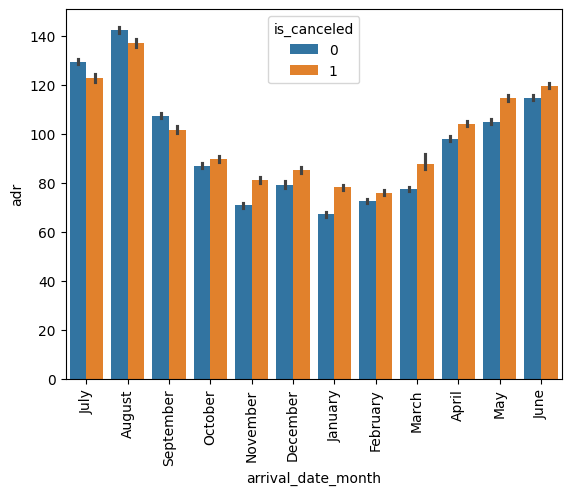

In [39]:
# WHich Month as Max Daily Rate
sns.barplot(x='arrival_date_month',y='adr', data=df_main,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

In [183]:
#!pip install sorted-months-weekdays
#!pip install sort_dataframeby-monthorweek

In [40]:
import sort_dataframeby_monthorweek as sd

In [41]:
df_hotels = sd.Sort_Dataframeby_Month(df_main,'arrival_date_month')

In [42]:
df_hotels.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015


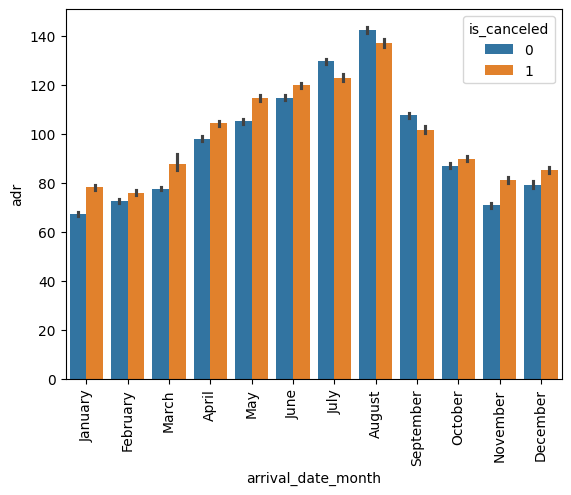

In [43]:
# WHich Month as Max Daily Rate
sns.barplot(x='arrival_date_month',y='adr', data=df_hotels,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df_main[['stays_in_weekend_nights','stays_in_week_nights']].head()

,stays_in_weekend_nights,stays_in_week_nights
0,0,0
1,0,0
2,0,1
3,0,1
4,0,2


In [46]:
df_main.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [47]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if row[feature2] == 0 and row[feature1] > 0:
        return 'stay_just_weekend'
    
    elif row[feature2] > 0 and row[feature1] == 0:
        return 'stay_just_weekdays'
    
    elif row[feature2] > 0 and row[feature1] > 0:
        return 'stay_both_weekdays_weekends'
    else:
        return 'undefined_data'

In [48]:
df_booking_wo_cancelled['weekend_or_weekday'] = df_booking_wo_cancelled.apply(week_function,axis=1)

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\723089556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booking_wo_cancelled['weekend_or_weekday'] = df_booking_wo_cancelled.apply(week_function,axis=1)


In [49]:
df_booking_wo_cancelled['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: count, dtype: int64

### Create more features

In [69]:
def family(row):
    if (row['adults'] > 0) & (row['children'] > 0 or row['babies'] > 0):
        return 1
    else:
        return 0

In [70]:
df_main['is_family'] = df_main.apply(family, axis=1)

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\2726370941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['is_family'] = df_main.apply(family, axis=1)


In [71]:
df_main['total_customer'] = df_main['adults'] + df_main['babies'] + df_main['children']

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\542122132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['total_customer'] = df_main['adults'] + df_main['babies'] + df_main['children']


In [72]:
df_main['total_nights'] = df_main['stays_in_week_nights'] + df_main['stays_in_weekend_nights']

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\3790424440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['total_nights'] = df_main['stays_in_week_nights'] + df_main['stays_in_weekend_nights']


In [73]:
df_main.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2


In [74]:
df_main['deposit_type'].value_counts()

deposit_type
No Deposit    104461
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [75]:
dict1={'No Deposit': 0, 'Non Refund':1, 'Refundable': 0}

In [76]:
df_main['deposit_given'] = df_main['deposit_type'].map(dict1)

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\1814972193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['deposit_given'] = df_main['deposit_type'].map(dict1)


In [77]:
df_main.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [78]:
df_main.drop(columns=['adults', 'children', 'babies', 'deposit_type'], axis=1, inplace=True)

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\3575853158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.drop(columns=['adults', 'children', 'babies', 'deposit_type'], axis=1, inplace=True)


In [79]:
df_main.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

### Apply Feature Encoding

In [80]:
df_main.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [81]:
# Separate categorical features
cate_features = [ col for col in df_main.columns if df_main[col].dtype == 'object']

In [82]:
num_features = [ col for col in df_main.columns if df_main[col].dtype != 'object']

In [83]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [84]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [87]:
cate_data = df_main[cate_features]
cate_data['cancellation'] = df_main['is_canceled']
cate_data.head()

C:\Users\smite\AppData\Local\Temp\ipykernel_23468\979293340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data['cancellation'] = df_main['is_canceled']


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,0
